In [105]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_palette('colorblind')

In [106]:
logdir = '../logs/coop2fixedFakeBot1/end_analysis/'

In [107]:
df = pd.read_csv(logdir + 'coop_stats_79.txt', delimiter='\t')
df

,fkeCoop,fkeRob,Rep,Iter,nbRob,Coop
0,0.0,0,0,0,1,0.022460
1,0.0,0,0,1,0,0.632100
2,0.0,0,0,2,0,0.006824
3,0.0,0,0,3,0,0.118000
4,0.0,0,0,4,0,0.059980
5,0.0,0,0,5,0,0.094960
6,0.0,0,0,6,0,0.068750
7,0.0,0,0,7,0,0.082950
8,0.0,0,0,8,0,0.073290
9,0.0,0,0,9,0,0.078840


In [108]:
fkecoop_vals = df['fkeCoop'].unique()
fkerob_vals = [0, 1]
rep_vals = df['Rep'].unique()

In [109]:
res = []
for rep in rep_vals:
    for coop in fkecoop_vals:
        for rob in fkerob_vals:
            cur_df = df.query('fkeCoop == {} and fkeRob == {} and Rep == {}'.format(coop, rob, rep))
            active_df = cur_df.query('nbRob > 0')
            active_percent = active_df.size / cur_df.size
            if active_df.size > 0:
                mean_active_invest = active_df['Coop'].mean()
            else:
                mean_active_invest = np.nan
            res.append({'fkeCoop': coop, 'fkeRob': rob, 'percent_active': active_percent, 'mean_invest': mean_active_invest, 'rep': rep})
res_df = pd.DataFrame(res)

<IPython.core.display.Javascript object>


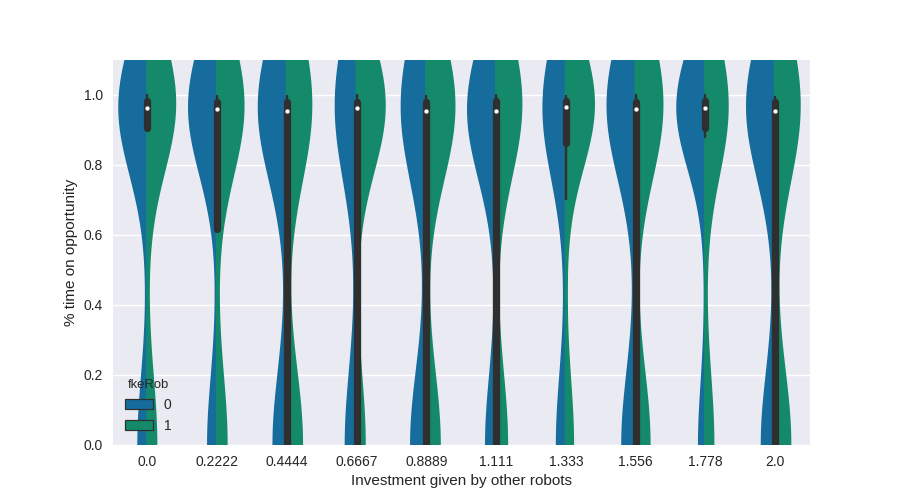

(0, 1.1)

In [110]:
plt.figure(figsize=(9, 5))
sns.violinplot(x='fkeCoop', y='percent_active', data=res_df, hue='fkeRob', split=True)
plt.ylabel('% time on opportunity')
plt.xlabel('Investment given by other robots')
plt.ylim((0, 1.1))

<IPython.core.display.Javascript object>


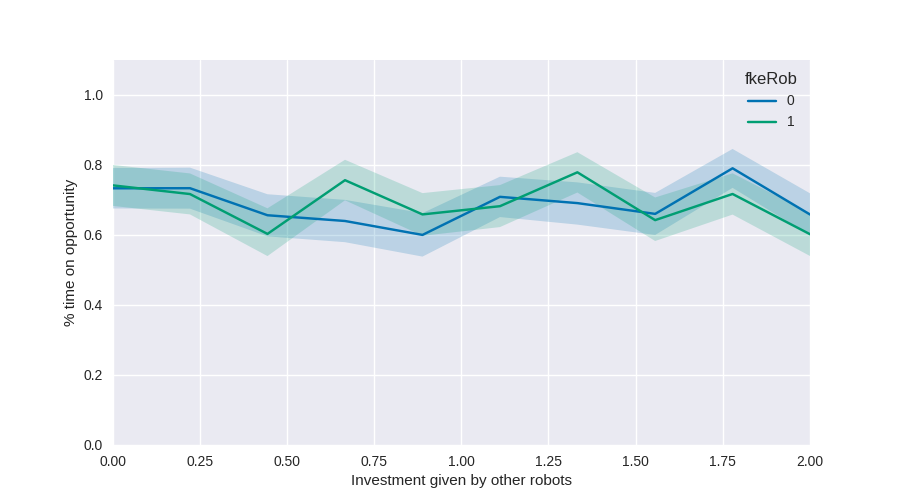

In [111]:
plt.figure(figsize=(9, 5))
sns.tsplot(data=res_df, time="fkeCoop", unit="rep", value="percent_active", condition="fkeRob")
plt.ylim((0, 1.1))
plt.ylabel('% time on opportunity')
plt.xlabel('Investment given by other robots')

<IPython.core.display.Javascript object>


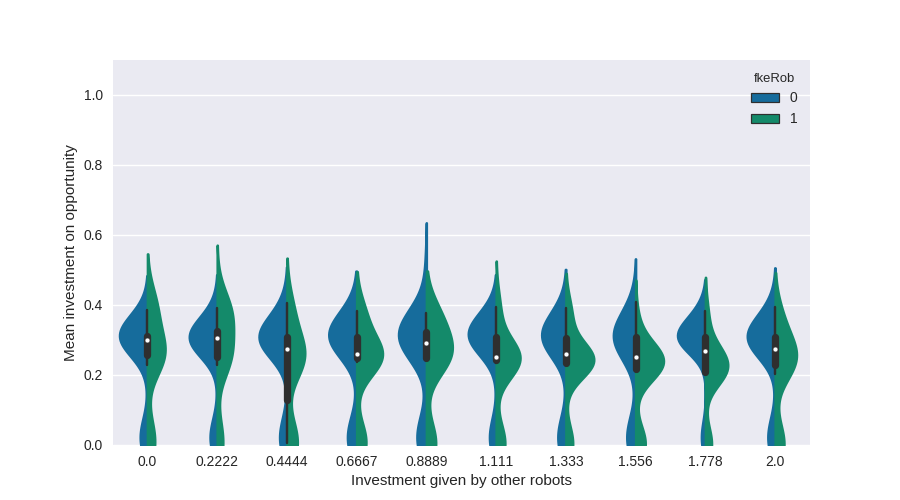

(0, 1.1)

In [112]:
plt.figure(figsize=(9, 5))
sns.violinplot(x='fkeCoop', y='mean_invest', data=res_df, hue="fkeRob", split=True)
plt.ylabel('Mean investment on opportunity')
plt.xlabel('Investment given by other robots')
plt.ylim((0, 1.1))

<IPython.core.display.Javascript object>


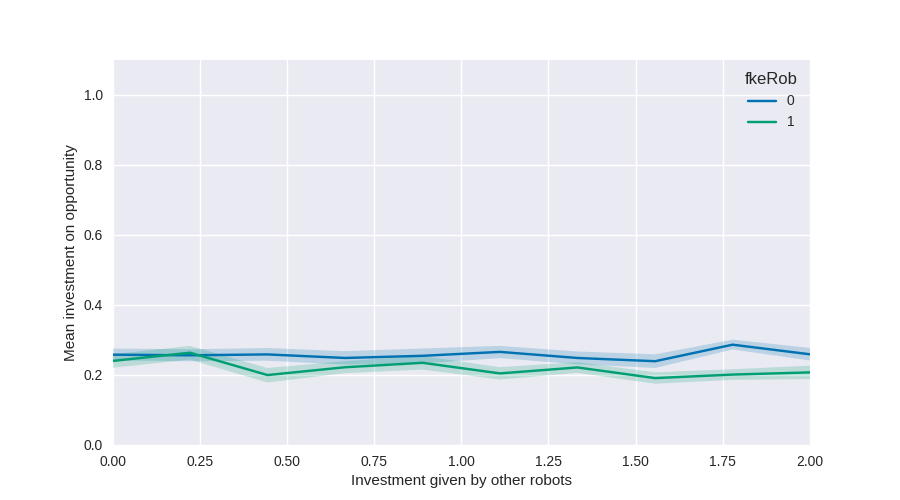

In [113]:
plt.figure(figsize=(9, 5))
sns.tsplot(data=res_df, time="fkeCoop", unit="rep", value="mean_invest", condition="fkeRob", estimator=np.nanmean)
plt.ylim((0, 1.1))
plt.ylabel('Mean investment on opportunity')
plt.xlabel('Investment given by other robots')

<IPython.core.display.Javascript object>


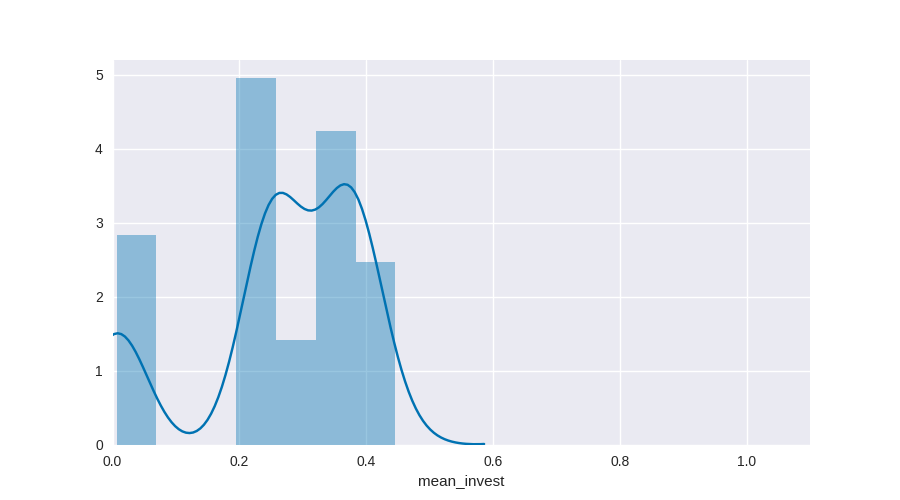

(0, 1.1)

In [114]:
plt.figure(figsize=(9, 5))
sns.distplot(res_df.query('fkeRob == 1 and 0.1 < fkeCoop < 0.3')['mean_invest'].dropna())
plt.xlim((0, 1.1))